In [62]:
import pandas as pd
import json

In [63]:
with open("../data/outputs/language_lookup.json") as json_file:
    language_lookup = json.load(json_file)

In [64]:
rename_lang = {'nld':'du', 'ekk': 'ee', 'eng':'en', 'fin': 'fi', 'deu': 'ge', 'ell':'gr', 'heb':'he',
 'ita':'it', 'nor':'no', 'rus':'ru', 'spa':'sp', 'tur':'tr'}

In [65]:
df_cosine_sim = pd.read_csv(r"../data/outputs/linguistic_similarities.csv").rename(columns = rename_lang)
df_cosine_sim["lang"] = df_cosine_sim['Unnamed: 0'].replace(rename_lang).values

In [66]:
df_cosine_sim

,Unnamed: 0,du,en,ee,fi,ge,gr,he,it,no,ru,sp,tr,lang
0,nld,1.000000,0.837914,0.778454,0.682242,0.915209,0.735120,0.663798,0.779484,0.870930,0.814277,0.736906,0.461880,du
1,eng,0.837914,1.000000,0.774955,0.677118,0.821643,0.732275,0.647440,0.750585,0.855193,0.783389,0.733594,0.424274,en
2,ekk,0.778454,0.774955,1.000000,0.844653,0.790599,0.766416,0.692057,0.758490,0.865444,0.848943,0.740839,0.526688,ee
3,fin,0.682242,0.677118,0.844653,1.000000,0.696868,0.716085,0.654206,0.664746,0.768843,0.809174,0.673324,0.569298,fi
4,deu,0.915209,0.821643,0.790599,0.696868,1.000000,0.745701,0.663189,0.764347,0.880705,0.825531,0.722596,0.481218,ge
5,ell,0.735120,0.732275,0.766416,0.716085,0.745701,1.000000,0.702431,0.802714,0.776151,0.813399,0.800563,0.507660,gr
6,heb,0.663798,0.647440,0.692057,0.654206,0.663189,0.702431,1.000000,0.707791,0.703051,0.713024,0.692203,0.433861,he
7,ita,0.779484,0.750585,0.758490,0.664746,0.764347,0.802714,0.707791,1.000000,0.769039,0.793395,0.897510,0.478162,it
8,nor,0.870930,0.855193,0.865444,0.768843,0.880705,0.776151,0.703051,0.769039,1.000000,0.859240,0.752101,0.486136,no
9,rus,0.814277,0.783389,0.848943,0.809174,0.825531,0.813399,0.713024,0.793395,0.859240,1.000000,0.776391,0.507972,ru


In [67]:
lang_values = []
lang_pairs = []
for key1 in language_lookup.keys():
    for key2 in language_lookup.keys():
        #print((key1, key2))
        val1 = float(df_cosine_sim[df_cosine_sim['lang'] == key1][key2])
        #cosine_sim[f'{key1}_{key2}'] =  val1
        lang_values.append(val1)
        lang_pairs.append(f'{key1}_{key2}')  
 

In [68]:
lang_values = []
lang_pairs = []
for key1 in language_lookup.keys():
    for key2 in language_lookup.keys():
        if (f'{key1}_{key2}' not in lang_pairs) and (f'{key2}_{key1}' not in lang_pairs):
            val1 = float(df_cosine_sim[df_cosine_sim['lang'] == key1][key2])
            lang_values.append(val1)
            lang_pairs.append(f'{key1}_{key2}')  

In [70]:
df_cosine_similarity = pd.DataFrame({'pair': lang_pairs, 'cosine_val': lang_values})

In [71]:
df_cosine_similarity

,pair,cosine_val
0,du_du,1.000000
1,du_ee,0.778454
2,du_en,0.837914
3,du_fi,0.682242
4,du_ge,0.915209
...,...,...
73,ru_sp,0.776391
74,ru_tr,0.507972
75,sp_sp,1.000000
76,sp_tr,0.441597


In [47]:
# with open("../data/outputs/cosine_similarity.json", "w") as outfile:
#     json.dump(cosine_sim, outfile)

In [57]:
df_logreg_similarity = pd.read_csv("../data/outputs/logreg_similarity.csv")

In [72]:
df_similarities = df_cosine_sim.merge(df_logreg_similarity, on = 'pair', how = 'left')

In [73]:
df_similarities

,pair,cosine_val,logreg_val,logreg_val_inverted
0,du_du,1.000000,0.051728,0.948272
1,du_ee,0.778454,0.087543,0.912457
2,du_en,0.837914,0.075988,0.924012
3,du_fi,0.682242,0.089617,0.910383
4,du_ge,0.915209,0.063957,0.936043
...,...,...,...,...
73,ru_sp,0.776391,0.076272,0.923728
74,ru_tr,0.507972,0.054937,0.945063
75,sp_sp,1.000000,0.068254,0.931746
76,sp_tr,0.441597,0.049100,0.950900


In [74]:
import matplotlib.pyplot as plt

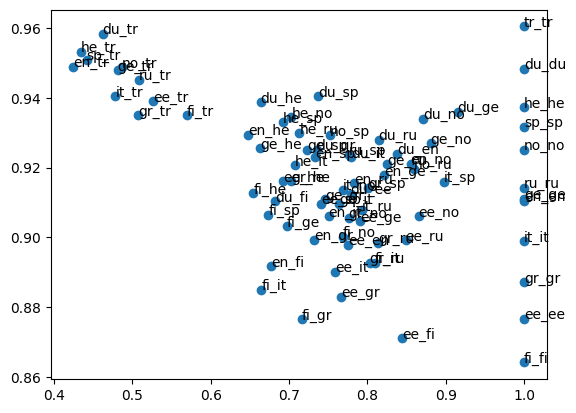

In [75]:
zz = df_similarities['cosine_val']
yy = df_similarities['logreg_val_inverted']

fig, ax = plt.subplots()
ax.scatter(zz, yy)


for i, txt in enumerate(df_similarities['pair']):
    ax.annotate(txt, (zz[i], yy[i]))